[0.278 0.281 0.285 0.304 0.309 0.315 0.335]
[  8.089     17.693348  36.385685  75.666    150.717    309.306
 597.506   ]


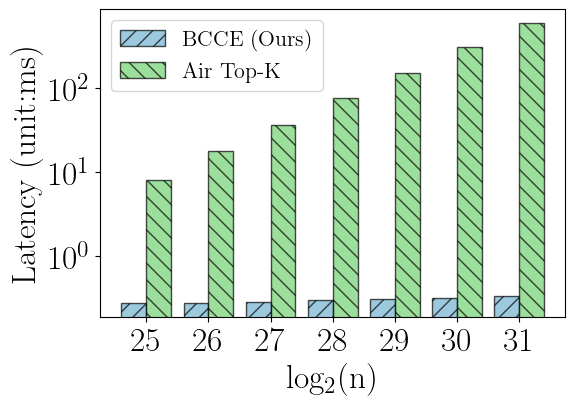

[  29.0971223    62.96565125  127.66907018  248.90131579  487.75728155
  981.92380952 1783.6       ]


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["font.size"] = 24
rcParams["font.family"] = "Times New Roman"
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"] + rcParams["font.serif"]

file_path = "case_study.xlsx"
df = pd.read_excel(file_path)

exp_n = [25, 26, 27, 28, 29, 30, 31]
BCCE_latency = df.iloc[0, 1:].str.replace("ms", "").astype(float).values
AirTopK_latency = df.iloc[1, 1:].str.replace("ms", "").astype(float).values
print(BCCE_latency)
print(AirTopK_latency)

# 计算柱子宽度和间距
bar_width = 0.4  # 设置柱子宽度
x_positions = np.arange(len(exp_n))  # 生成等距的横坐标

color_blue = "#72b3d0"  # BCCE 的颜色
color_green = "#72d072"  # baseline 的颜色

plt.figure(figsize=(6, 4))
plt.bar(x_positions - bar_width/2, BCCE_latency, width=bar_width, label="BCCE (Ours)", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
plt.bar(x_positions + bar_width/2, AirTopK_latency, width=bar_width, label="Air Top-K", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)


plt.xticks(x_positions, exp_n)  
plt.xlabel("log$_{2}$(n)")
plt.ylabel("Latency (unit:ms)")
plt.yscale('log')   
# plt.ylim(10**-1, 10**3)
plt.legend(fontsize=16)
plt.minorticks_off()

plt.savefig("case_study.pdf", bbox_inches = "tight")
plt.show()
plt.close()

print(AirTopK_latency / BCCE_latency)



[0.281 0.285 0.304 0.309 0.315 0.335]
[ 17.693348  36.385685  75.666    150.717    309.306    597.506   ]


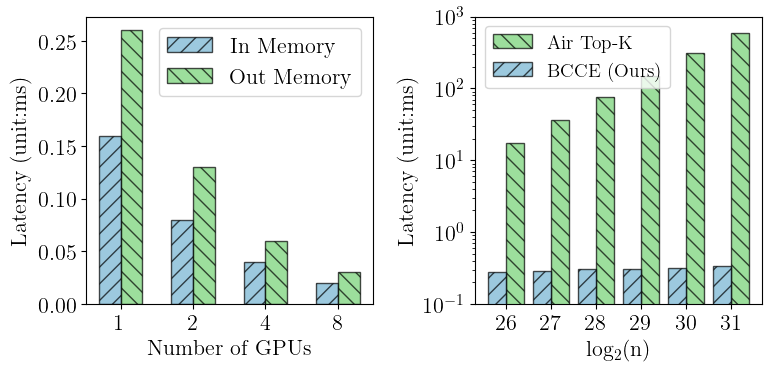

In [40]:
rcParams["font.size"] = 16
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"] + rcParams["font.serif"]

fig, axs = plt.subplots(1, 2, figsize=(8, 4))


# figure 0
ax = axs[0]
file_path = "../../output/5_8/5_8.xlsx"
df = pd.read_excel(file_path)
gpu_nums = np.array([1, 2, 4, 8])  # 确保横坐标是等比例的
in_memory_times = df.iloc[0, 1:].values  # 第一行是 in-memory 版本
out_memory_times = df.iloc[1, 1:].values  # 第二行是 out-of-memory 版本
bar_width = 0.3  # 设置柱子宽度
x_positions = np.arange(len(gpu_nums))  # 生成等距的横坐标
color_blue = "#72b3d0"  # BCCE 的颜色
color_green = "#72d072"  # baseline 的颜色
ax.bar(x_positions - bar_width/2, in_memory_times, width=bar_width, label="In Memory", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax.bar(x_positions + bar_width/2, out_memory_times, width=bar_width, label="Out Memory", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
ax.set_xticks(x_positions, gpu_nums)  
ax.set_xlabel("Number of GPUs")
ax.set_ylabel("Latency (unit:ms)")
ax.legend()

# figure 2
ax = axs[1]
file_path = "case_study.xlsx"
df = pd.read_excel(file_path)
# exp_n = [25, 26, 27, 28, 29, 30, 31]
# BCCE_latency = df.iloc[0, 1:].str.replace("ms", "").astype(float).values
# AirTopK_latency = df.iloc[1, 1:].str.replace("ms", "").astype(float).values
exp_n = [26, 27, 28, 29, 30, 31]
BCCE_latency = df.iloc[0, 2:].str.replace("ms", "").astype(float).values
AirTopK_latency = df.iloc[1, 2:].str.replace("ms", "").astype(float).values
print(BCCE_latency)
print(AirTopK_latency)
# 计算柱子宽度和间距
bar_width = 0.4  # 设置柱子宽度
x_positions = np.arange(len(exp_n))  # 生成等距的横坐标
color_blue = "#72b3d0"  # BCCE 的颜色
color_green = "#72d072"  # baseline 的颜色
ax.bar(x_positions + bar_width/2, AirTopK_latency, width=bar_width, label="Air Top-K", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
ax.bar(x_positions - bar_width/2, BCCE_latency, width=bar_width, label="BCCE (Ours)", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax.set_xticks(x_positions, exp_n)  
ax.set_xlabel("log$_{2}$(n)")
ax.set_ylabel("Latency (unit:ms)")
ax.set_yscale('log')   
ax.set_ylim(10**-1, 10**3)
ax.legend(fontsize=14)

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.185, 1.0, 0.8, 0.1))

plt.tight_layout()  # 自动调整布局
plt.savefig("combined.pdf", bbox_inches="tight")
plt.show()